In [1]:
# import necessary libraries

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

from ydata_profiling import ProfileReport
import missingno 
%matplotlib inline
# from IPython.display import Image
## import function needed for split
from sklearn.model_selection import train_test_split


## import classes necessary for building preprocessing pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import tree


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

/Users/jdapeman/anaconda3/envs/apple/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/jdapeman/anaconda3/envs/apple/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [2]:
def calculate_null_percentage(df):  
    
 
    import pandas as pd
    
    missing_vals = pd.DataFrame()
    missing_vals['Number of Nulls'] = df.isna().sum()
    missing_vals['% Null'] = (df.isna().sum() / len(df)) * 100
    
    return missing_vals
    
    
def check_unique(df, col, dropna=False):   
    
  
    
    import pandas as pd
        
    unique_vals = pd.DataFrame(df[col].value_counts(dropna=dropna))
    
    return unique_vals

In [3]:
df_1 = pd.read_csv('/Users/jdapeman/Documents/flu_shot_V1/CSV_FOLDER/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Test_Features.csv')
features_df = pd.read_csv('/Users/jdapeman/Documents/flu_shot_V1/CSV_FOLDER/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Training_Features.csv')
labels_df = pd.read_csv('/Users/jdapeman/Documents/flu_shot_V1/CSV_FOLDER/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Training_Labels.csv')

In [4]:
features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,1.000,2.000,2.000,1.000,2.000,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000,0.000,NaN,NaN
1,1,3.000,2.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,5.000,4.000,4.000,4.000,2.000,4.000,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000,0.000,pxcmvdjn,xgwztkwe
2,2,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,1.000,0.000,0.000,NaN,3.000,1.000,1.000,4.000,1.000,2.000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.000,0.000,rucpziij,xtkaffoo
3,3,1.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,NaN,3.000,3.000,5.000,5.000,4.000,1.000,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000,0.000,NaN,NaN
4,4,2.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,NaN,3.000,3.000,2.000,3.000,1.000,4.000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.000,0.000,wxleyezf,emcorrxb


In [5]:
labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [6]:
df_1.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.000,2.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,5.000,1.000,1.000,5.000,1.000,1.000,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.000,0.000,atmlpfrs,hfxkjkmi
1,26708,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,1.000,1.000,4.000,1.000,1.000,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.000,0.000,atmlpfrs,xqwwgdyp
2,26709,2.000,2.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,NaN,5.000,4.000,2.000,5.000,4.000,4.000,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.000,0.000,nduyfdeo,pvmttkik
3,26710,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,4.000,2.000,2.000,4.000,4.000,2.000,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.000,0.000,NaN,NaN
4,26711,3.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,5.000,2.000,4.000,4.000,4.000,2.000,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.000,1.000,fcxhlnwr,mxkfnird


In [7]:
df = pd.concat([features_df, labels_df.drop('respondent_id', axis=1)], axis=1)
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,1.000,2.000,2.000,1.000,2.000,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000,0.000,NaN,NaN,0,0
1,1,3.000,2.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,5.000,4.000,4.000,4.000,2.000,4.000,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000,0.000,pxcmvdjn,xgwztkwe,0,1
2,2,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,1.000,0.000,0.000,NaN,3.000,1.000,1.000,4.000,1.000,2.000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.000,0.000,rucpziij,xtkaffoo,0,0
3,3,1.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,NaN,3.000,3.000,5.000,5.000,4.000,1.000,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000,0.000,NaN,NaN,0,1
4,4,2.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,NaN,3.000,3.000,2.000,3.000,1.000,4.000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.000,0.000,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,3.000,1.000,1.000,5.000,2.000,2.000,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.000,0.000,NaN,NaN,0,0
26703,26703,1.000,2.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,4.000,2.000,2.000,5.000,1.000,1.000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.000,0.000,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.000,2.000,0.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,NaN,4.000,4.000,2.000,5.000,4.000,2.000,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.000,0.000,NaN,NaN,0,1
26705,26705,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,3.000,1.000,2.000,2.000,1.000,2.000,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.000,0.000,fcxhlnwr,haliazsg,0,0


In [8]:
df.drop(columns=['opinion_seas_vacc_effective',
                 'opinion_seas_risk',
                 'opinion_seas_sick_from_vacc',
                 'doctor_recc_seasonal',
                 'seasonal_vaccine',
                 'behavioral_antiviral_meds',
                 'respondent_id'], axis=1, inplace=True)

In [9]:
df.shape

(26707, 31)

In [10]:
def calculate_null_percentage(df):
    missing_vals = pd.DataFrame()
    missing_vals['Number of Nulls'] = df.isna().sum()
    missing_vals['% Null'] = (df.isna().sum() / len(df)) * 100
    
    return missing_vals

In [11]:
calculate_null_percentage(df)

,Number of Nulls,% Null
h1n1_concern,92,0.344
h1n1_knowledge,116,0.434
behavioral_avoidance,208,0.779
behavioral_face_mask,19,0.071
behavioral_wash_hands,42,0.157
behavioral_large_gatherings,87,0.326
behavioral_outside_home,82,0.307
behavioral_touch_face,128,0.479
doctor_recc_h1n1,2160,8.088
chronic_med_condition,971,3.636


In [12]:
# Calculate the percentage of missing values for each column and then 
# filter columns with less than 5% missing values and not equal to zero
def print_columns_missing_info(df):
    total_rows = len(df)
    missing_percentages = (df.isnull().sum() / total_rows) * 100
    columns_missing_info = missing_percentages[(missing_percentages < 5) & (missing_percentages > 0)]
    if len(columns_missing_info) > 0:
        for column in columns_missing_info.index:
            print(column)
            
print_columns_missing_info(df)

h1n1_concern
h1n1_knowledge
behavioral_avoidance
behavioral_face_mask
behavioral_wash_hands
behavioral_large_gatherings
behavioral_outside_home
behavioral_touch_face
chronic_med_condition
child_under_6_months
health_worker
opinion_h1n1_vacc_effective
opinion_h1n1_risk
opinion_h1n1_sick_from_vacc
household_adults
household_children


In [13]:
no_null_cols = [col for col in df.columns if df[col].isna().sum()==0]
no_null_cols

['age_group', 'race', 'sex', 'hhs_geo_region', 'census_msa', 'h1n1_vaccine']

In [14]:
# select individuals not in the labor force
not_in_labor_force = df[df['employment_status']=='Not in Labor Force']
calculate_null_percentage(not_in_labor_force)

,Number of Nulls,% Null
h1n1_concern,56,0.547
h1n1_knowledge,58,0.567
behavioral_avoidance,104,1.017
behavioral_face_mask,9,0.088
behavioral_wash_hands,22,0.215
behavioral_large_gatherings,46,0.450
behavioral_outside_home,49,0.479
behavioral_touch_face,67,0.655
doctor_recc_h1n1,843,8.240
chronic_med_condition,91,0.889


In [15]:
# select unemployed individuals
unemployed = df[df['employment_status']=='Unemployed']
calculate_null_percentage(unemployed)

,Number of Nulls,% Null
h1n1_concern,3,0.206
h1n1_knowledge,10,0.688
behavioral_avoidance,6,0.413
behavioral_face_mask,1,0.069
behavioral_wash_hands,0,0.000
behavioral_large_gatherings,5,0.344
behavioral_outside_home,2,0.138
behavioral_touch_face,7,0.482
doctor_recc_h1n1,94,6.469
chronic_med_condition,16,1.101


In [16]:
# takes the dataframe and column name and returns the unique values in that column as well as the 
# number of each unique values.           
def count_unique_values(df, col, dropna=False):
    unique_vals = pd.DataFrame(df[col].value_counts(dropna=dropna))
    
    return unique_vals

In [17]:
# creating not_employed from labor force
# if a person is unemployed change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Unemployed', 'employment_industry'] = 'not employed'

# if a person is not in the labor force change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Not in Labor Force', 'employment_industry'] = 'not employed'

count_unique_values(df, 'employment_industry')

,employment_industry
not employed,11684
fcxhlnwr,2468
wxleyezf,1804
NaN,1646
ldnlellj,1231
pxcmvdjn,1037
atmlpfrs,926
arjwrbjb,871
xicduogh,851
mfikgejo,614


In [18]:
# creating not_employed from employment industry
# if a person is unemployed, change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Unemployed', 'employment_occupation'] = 'not employed'

# if a person is not in the labor force, change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Not in Labor Force', 'employment_occupation'] = 'not employed'

count_unique_values(df, 'employment_occupation')

,employment_occupation
not employed,11684
NaN,1786
xtkaffoo,1778
mxkfnird,1509
emcorrxb,1270
cmhcxjea,1247
xgwztkwe,1082
hfxkjkmi,766
qxajmpny,548
xqwwgdyp,485


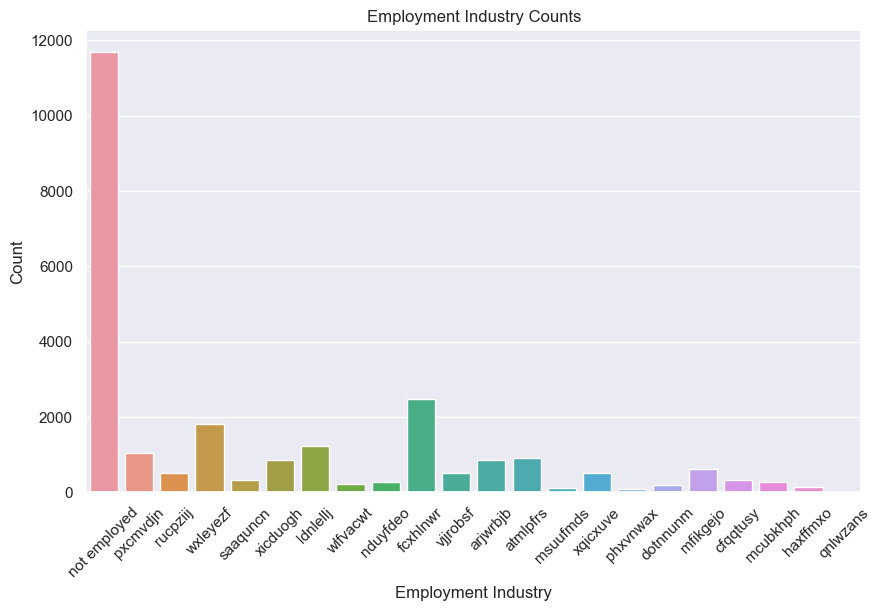

In [19]:
# Bar plot of employment industry counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='employment_industry')
plt.title('Employment Industry Counts')
plt.xlabel('Employment Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

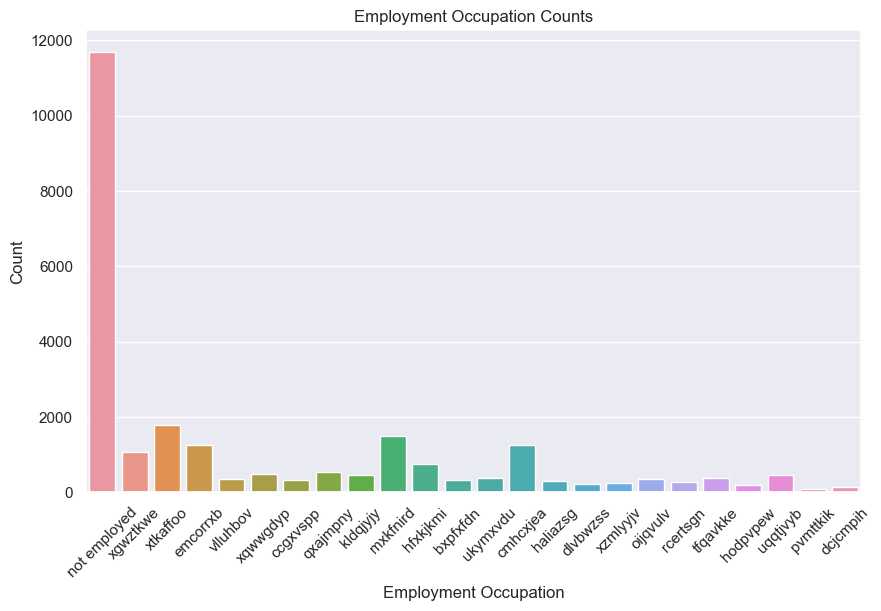

In [20]:
# Bar plot of employment occupation counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='employment_occupation')
plt.title('Employment Occupation Counts')
plt.xlabel('Employment Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
# columns with null between 0 and 5%, exluding values of 0
null_df = calculate_null_percentage(df)
null_df.drop(index=null_df.loc[null_df['% Null']==0].index, axis=0, inplace=True)
under_5_null = null_df.loc[null_df['% Null']<5]
under_5_null

,Number of Nulls,% Null
h1n1_concern,92,0.344
h1n1_knowledge,116,0.434
behavioral_avoidance,208,0.779
behavioral_face_mask,19,0.071
behavioral_wash_hands,42,0.157
behavioral_large_gatherings,87,0.326
behavioral_outside_home,82,0.307
behavioral_touch_face,128,0.479
chronic_med_condition,971,3.636
child_under_6_months,820,3.070


In [22]:
# dropping the rows with less than 5% of null values
under_5_null_cols = list(under_5_null.index)
df.dropna(subset=under_5_null_cols, inplace=True)
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,3.000,1.000,2.000,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000,0.000,not employed,not employed,0
1,3.000,2.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,5.000,4.000,4.000,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000,0.000,pxcmvdjn,xgwztkwe,0
2,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,NaN,1.000,0.000,0.000,NaN,3.000,1.000,1.000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.000,0.000,rucpziij,xtkaffoo,0
3,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,NaN,3.000,3.000,5.000,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000,0.000,not employed,not employed,0
4,2.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,NaN,3.000,3.000,2.000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.000,0.000,wxleyezf,emcorrxb,0


In [23]:
df.shape

(24879, 31)

In [24]:
# the result is a dataframe with rows containing less than 5% of info have been dropped
calculate_null_percentage(df)

,Number of Nulls,% Null
h1n1_concern,0,0.000
h1n1_knowledge,0,0.000
behavioral_avoidance,0,0.000
behavioral_face_mask,0,0.000
behavioral_wash_hands,0,0.000
behavioral_large_gatherings,0,0.000
behavioral_outside_home,0,0.000
behavioral_touch_face,0,0.000
doctor_recc_h1n1,1838,7.388
chronic_med_condition,0,0.000


In [25]:
no_null_cols = [col for col in df.columns if df[col].isna().sum()==0]

no_null_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'age_group',
 'race',
 'sex',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'h1n1_vaccine']

In [26]:
behavior_cols = [x for x in df.columns if 'behavioral' in x]
behavior_cols

['behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face']

In [27]:
df['behav_score'] = df[behavior_cols].sum(axis=1)
df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation',
       'h1n1_vaccine', 'behav_score'],
      dtype='object')

In [28]:
def check_column(df, column_name):
    unique_values = df[column_name].value_counts().reset_index()
    unique_values.columns = [column_name, 'Count']
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    sns.histplot(df[column_name].dropna(), kde=False, ax=axes[0])
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Distribution of {}'.format(column_name))
    
    sns.boxplot(x=column_name, data=df, ax=axes[1])
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Value')
    axes[1].set_title('Box and Whisker Plot of {}'.format(column_name))
    
    plt.tight_layout()
    plt.show()
    
    return unique_values

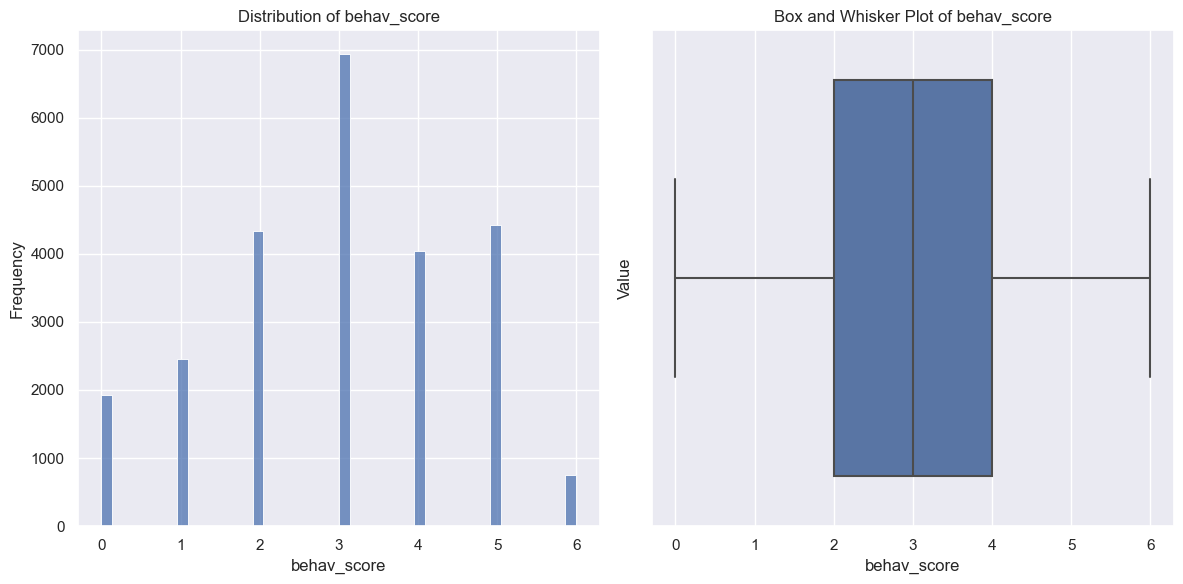

,behav_score,Count
0,3.000,6938
1,5.000,4431
2,2.000,4334
3,4.000,4045
4,1.000,2462
5,0.000,1924
6,6.000,745


In [29]:
check_column(df, 'behav_score')

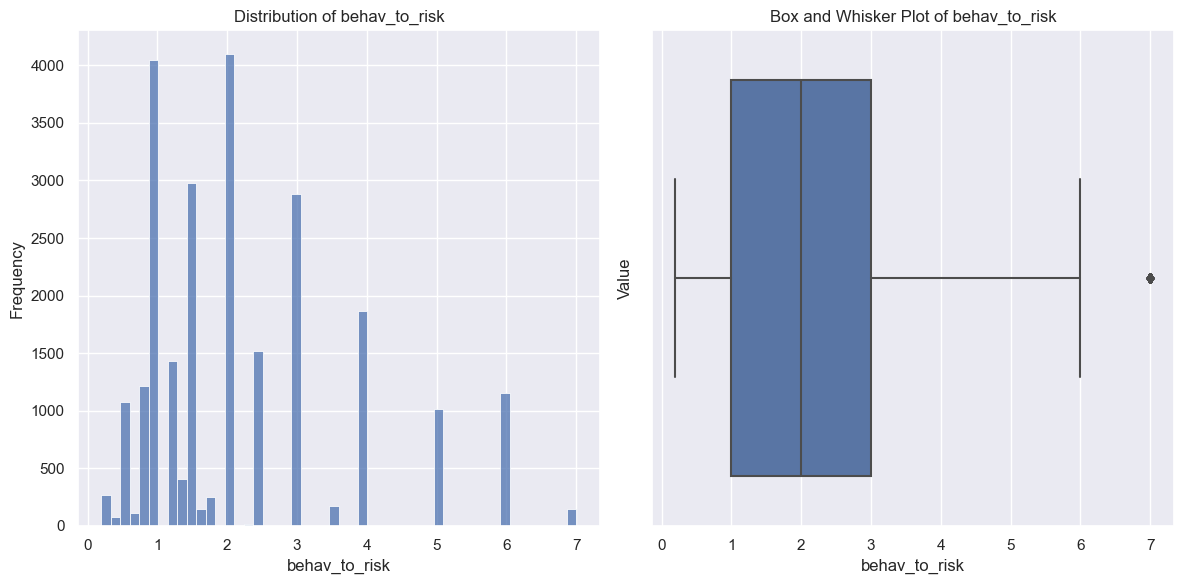

,behav_to_risk,Count
0,2.000,4098
1,1.000,4043
2,1.500,2978
3,3.000,2881
4,4.000,1869
5,2.500,1519
6,6.000,1151
7,5.000,1012
8,1.250,1001
9,0.500,877


In [31]:
df['behav_to_risk'] = (df['behav_score'] + 1) / df['opinion_h1n1_risk']
check_column(df, 'behav_to_risk')

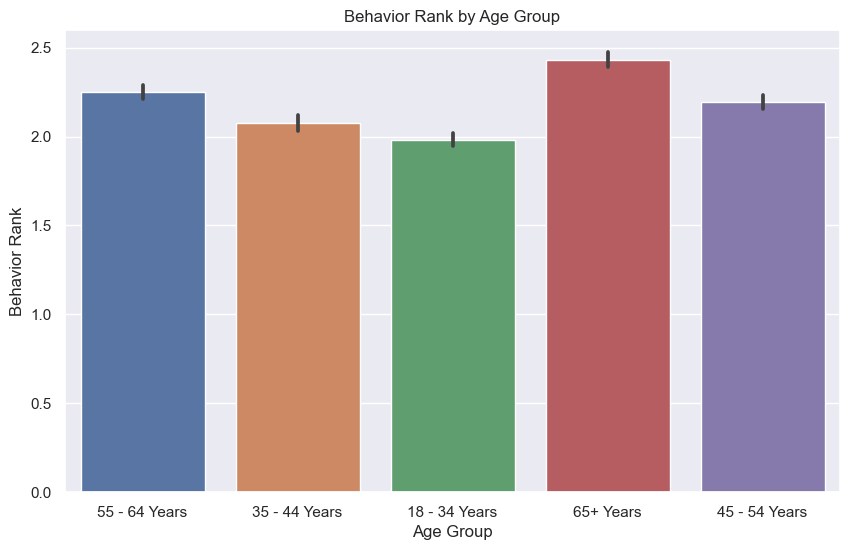

In [32]:
# Plotting 'behavior_rank' and 'age_group'
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='behav_to_risk', data=df)
plt.xlabel('Age Group')
plt.ylabel('Behavior Rank')
plt.title('Behavior Rank by Age Group')
plt.show()

In [33]:
# Create a function for whether or not an individual is 65 years or older as this
# represents a group at higher risk for serious complications from the flu.
def is_older_65(row):
    if row['age_group'] == '65+ Years':
        return 1
    else:
        return 0

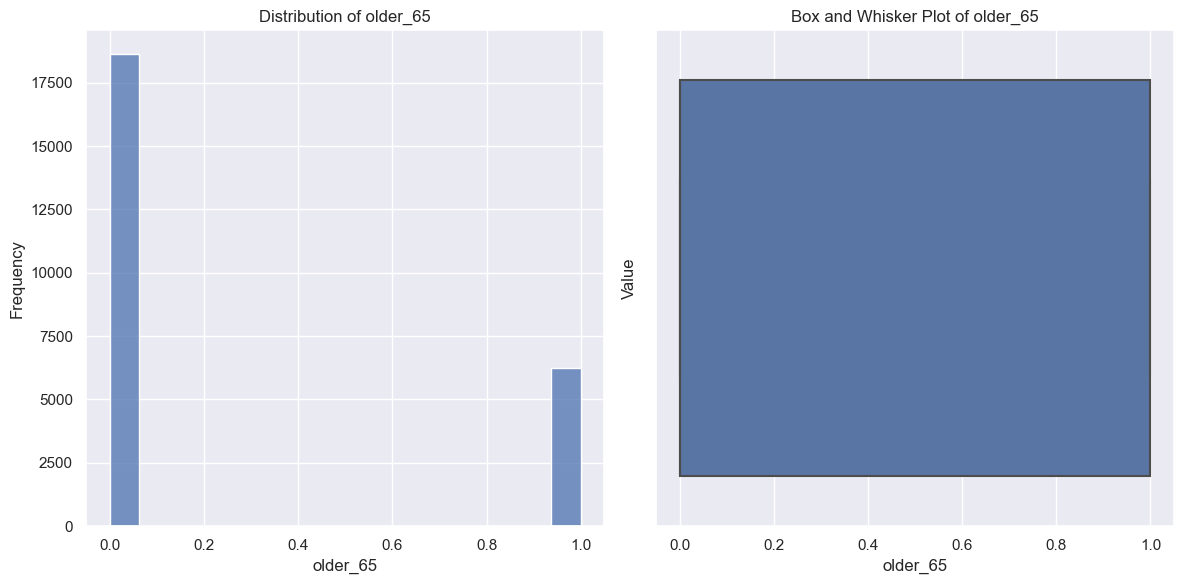

,older_65,Count
0,0,18636
1,1,6243


In [34]:
# 'older_65' variable for whether or not an individual is 65 years or older as this represents a group at higher risk 
# for serious complications from the flu.
df['older_65'] = df.apply(lambda x: is_older_65(x), axis=1)

# check counts of unique values in new col and plot distribution
check_column(df, 'older_65')

In [35]:
# function to calculate score for high risk of complications
def calc_high_risk(row):
    risk = 0
    if row['older_65'] == 1:
        risk += 1
    if row['child_under_6_months'] == 1:
        risk += 1
    if row['chronic_med_condition'] == 1:
        risk += 1
    return risk

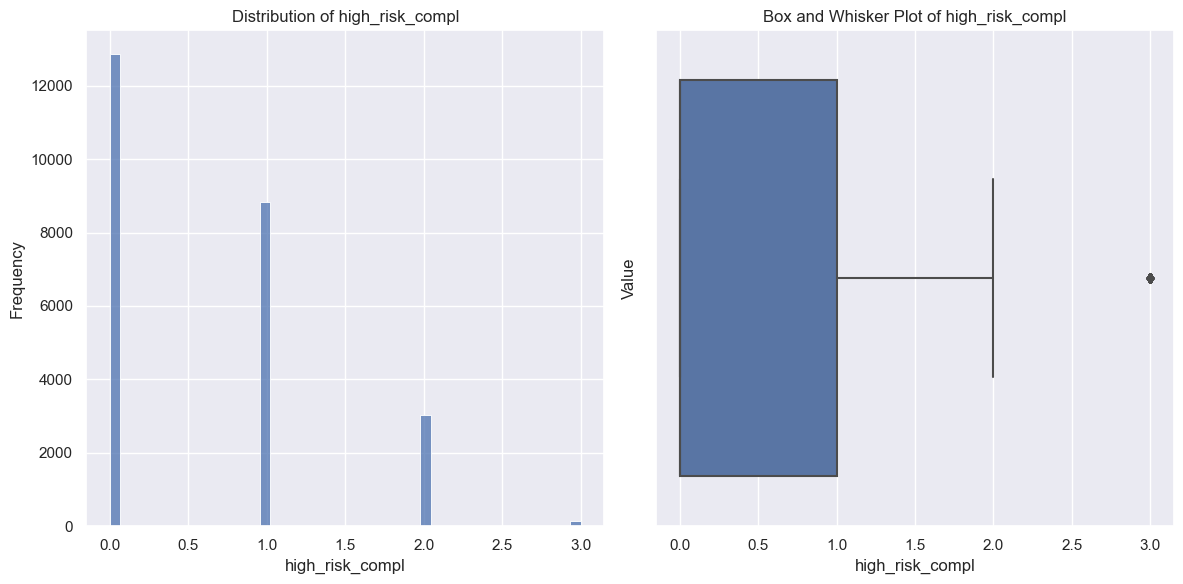

,high_risk_compl,Count
0,0,12869
1,1,8828
2,2,3041
3,3,141


In [36]:
# create new column 'high_risk_compl'
df['high_risk_compl'] = df.apply(lambda x: calc_high_risk(x), axis=1)

check_column(df, 'high_risk_compl')

In [37]:
df['high_risk_cat'] = df['high_risk_compl'].map({0:'low risk', 1:'med risk', 2:'high risk', 3:'high risk'})
df['high_risk_cat'].value_counts()

low risk     12869
med risk      8828
high risk     3182
Name: high_risk_cat, dtype: int64

In [39]:
df['doctor_recc_h1n1'] = df['doctor_recc_h1n1'].map({1.0: '1', 0.0: '0'})
df['doctor_recc_h1n1'].value_counts(dropna=False)

0      17920
1       5121
NaN     1838
Name: doctor_recc_h1n1, dtype: int64

In [40]:
df['health_insurance'] = df['health_insurance'].map({1.0: '1', 0.0: '0'})
df['health_insurance'].value_counts(dropna=False)

1      12202
NaN    11009
0       1668
Name: health_insurance, dtype: int64

In [41]:
# define a function to return make combine people of color 
def race_func(row):
    if row['race'] == 'White':
        return 'White'
    else:
        return 'POC'

In [42]:
df['race'] = df.apply(lambda x: race_func(x), axis=1)
df['race'].value_counts(dropna=False)

White    19812
POC       5067
Name: race, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24879 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 24879 non-null  float64
 1   h1n1_knowledge               24879 non-null  float64
 2   behavioral_avoidance         24879 non-null  float64
 3   behavioral_face_mask         24879 non-null  float64
 4   behavioral_wash_hands        24879 non-null  float64
 5   behavioral_large_gatherings  24879 non-null  float64
 6   behavioral_outside_home      24879 non-null  float64
 7   behavioral_touch_face        24879 non-null  float64
 8   doctor_recc_h1n1             23041 non-null  object 
 9   chronic_med_condition        24879 non-null  float64
 10  child_under_6_months         24879 non-null  float64
 11  health_worker                24879 non-null  float64
 12  health_insurance             13870 non-null  object 
 13  opinion_h1n1_vac

In [44]:
# create df with remaining null values filled in with 'missing' for vizualizations
df_missing = df.fillna(value='missing')
df_missing.head()

,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,behav_score,behav_to_risk,older_65,high_risk_compl,high_risk_cat
0,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0.000,0.000,0.000,1,3.000,1.000,2.000,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000,0.000,not employed,not employed,0,2.000,3.000,0,0,low risk
1,3.000,2.000,1.000,0.000,1.000,0.000,1.000,1.000,0,0.000,0.000,0.000,1,5.000,4.000,4.000,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000,0.000,pxcmvdjn,xgwztkwe,0,4.000,1.250,0,0,low risk
2,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,missing,1.000,0.000,0.000,missing,3.000,1.000,1.000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.000,0.000,rucpziij,xtkaffoo,0,1.000,2.000,0,1,med risk
3,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0,1.000,0.000,0.000,missing,3.000,3.000,5.000,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000,0.000,not employed,not employed,0,3.000,1.333,1,2,high risk
4,2.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,0,0.000,0.000,0.000,missing,3.000,3.000,2.000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.000,0.000,wxleyezf,emcorrxb,0,4.000,1.667,0,0,low risk


In [45]:
feats_to_drop = ['older_65', 'high_risk_compl']
df.drop(columns=feats_to_drop, axis=1, inplace=True)
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,behav_score,behav_to_risk,high_risk_cat
0,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0.000,0.000,0.000,1,3.000,1.000,2.000,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000,0.000,not employed,not employed,0,2.000,3.000,low risk
1,3.000,2.000,1.000,0.000,1.000,0.000,1.000,1.000,0,0.000,0.000,0.000,1,5.000,4.000,4.000,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000,0.000,pxcmvdjn,xgwztkwe,0,4.000,1.250,low risk
2,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,NaN,1.000,0.000,0.000,NaN,3.000,1.000,1.000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.000,0.000,rucpziij,xtkaffoo,0,1.000,2.000,med risk
3,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0,1.000,0.000,0.000,NaN,3.000,3.000,5.000,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000,0.000,not employed,not employed,0,3.000,1.333,high risk
4,2.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,0,0.000,0.000,0.000,NaN,3.000,3.000,2.000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.000,0.000,wxleyezf,emcorrxb,0,4.000,1.667,low risk


In [46]:
null_df = calculate_null_percentage(df)
miss_val_cols = list(null_df.loc[null_df['% Null']>0].index)
miss_val_cols 

['doctor_recc_h1n1',
 'health_insurance',
 'education',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'employment_industry',
 'employment_occupation']

In [47]:
# list of all columns that are currently a object
obj_cols = list(df.select_dtypes('O').columns)
cat_cols = list(set(obj_cols + miss_val_cols))
cat_cols

['race',
 'doctor_recc_h1n1',
 'employment_occupation',
 'high_risk_cat',
 'hhs_geo_region',
 'employment_industry',
 'education',
 'marital_status',
 'employment_status',
 'sex',
 'income_poverty',
 'age_group',
 'rent_or_own',
 'health_insurance',
 'census_msa']

In [48]:
num_cols = [col for col in df.drop('h1n1_vaccine', axis=1).columns if col not in cat_cols]
num_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'household_adults',
 'household_children',
 'behav_score',
 'behav_to_risk']

In [49]:
# define target variable
target = 'h1n1_vaccine'

# separate of features (X) and target (y) for train-test-split
X = df.drop(columns=target, axis=1).copy()
y = df[target].copy()

# split the data into training and test sets prior to preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## check for class imbalance across all sets of y
print('**original**\n', y.value_counts(normalize=True), '\n------\n')
print('**y_train**\n', y_train.value_counts(normalize=True), '\n------\n')
print('**y_test**\n', y_test.value_counts(normalize=True), '\n------\n')

**original**
 0   0.785
1   0.215
Name: h1n1_vaccine, dtype: float64 
------

**y_train**
 0   0.787
1   0.213
Name: h1n1_vaccine, dtype: float64 
------

**y_test**
 0   0.782
1   0.218
Name: h1n1_vaccine, dtype: float64 
------

